In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [24]:
def plot_history(history, metrics, model_name:str):
    fig = plt.figure(figsize=[8, 4])
    for metric in metrics:
        plt.plot(history.history[metric], label='train '+ metric)
        plt.plot(history.history['val_' + metric], label='val ' + metric)        
    plt.legend()    
    plt.xlabel('epoch')
    plt.ylabel(" ".join(metrics))
    plt.grid(visible=True)
    plt.title(model_name + " training history [" + " ".join(metrics) + "]")

## Adult

In [28]:
# 1.1 read data 
filename = 'adult.csv'
df = pd.read_csv(filename)
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [29]:
names = list(df.columns)
print(names)

['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0', ' 40', ' United-States', ' <=50K']


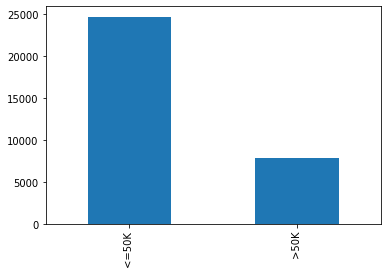

In [30]:
g = df[names[-1]].value_counts()
g.plot.bar()

In [31]:
types = df.dtypes
print(types)

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object


In [32]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[names[i]])
    df[names[i]] = le.transform(df[names[i]])

In [33]:
data = df.values
print(data)

[[    50      6  83311 ...     13     39      0]
 [    38      4 215646 ...     40     39      0]
 [    53      4 234721 ...     40     39      0]
 ...
 [    58      4 151910 ...     40     39      0]
 [    22      4 201490 ...     20     39      0]
 [    52      5 287927 ...     40     39      1]]


In [35]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(32560, 14)
(32560,)


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.45205479 0.75       0.0482376  0.6        0.8        0.33333333
 0.28571429 0.         1.         1.         0.         0.
 0.12244898 0.95121951]


In [37]:
x_train_adult, x_test_adult, y_train_adult, y_test_adult = train_test_split(X_scaled, y, train_size=0.8)


In [17]:
print(X_test)

[[0.26027397 0.5        0.06430163 ... 0.         0.39795918 0.95121951]
 [0.2739726  0.5        0.07768843 ... 0.         0.39795918 0.95121951]
 [0.26027397 0.5        0.08444873 ... 0.         0.39795918 0.95121951]
 ...
 [0.10958904 0.5        0.11817892 ... 0.         0.5        0.95121951]
 [0.20547945 0.875      0.11114084 ... 0.         0.39795918 0.95121951]
 [0.         0.         0.30040953 ... 0.         0.07142857 0.95121951]]


In [38]:
ad_cce = Sequential([
    Dense(units=32, input_dim= X_scaled.shape[1], activation="relu"),
    Dense(units=16,activation="relu"),
    Dense(units=8, activation="relu"),
    Dense(units=2, activation="softmax")
])
ad_cce.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                480       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,162
Trainable params: 1,162
Non-trainable params: 0
_________________________________________________________________


In [39]:
ad_cce.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [40]:
history_ad_cce = ad_cce.fit(x_train_adult, y_train_adult, epochs=10, verbose=0, validation_split=0.2)


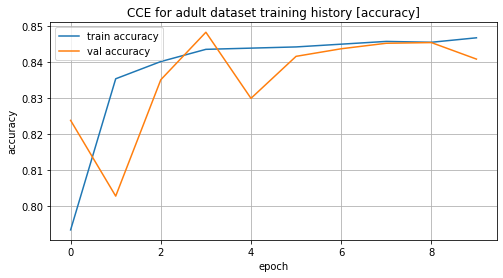

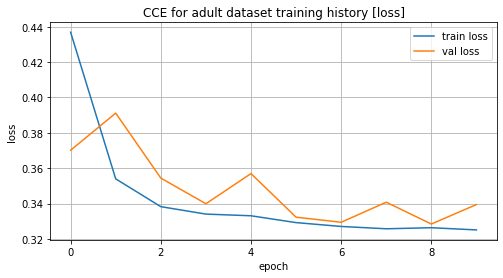

In [41]:
plot_history(history_ad_cce, metrics=["accuracy"],model_name="CCE for adult dataset")
plot_history(history_ad_cce, metrics=["loss"],model_name="CCE for adult dataset")

In [42]:
result_ad_cce = ad_cce.evaluate(x_test_adult, y_test_adult)


204/204 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8404


## House Pricing

In [44]:
#import Data
df = pd.read_csv('house_pricing.csv')


In [45]:
df = df.drop(['date','id','zipcode'],axis=1)

In [46]:
X = df.drop('price',axis =1).values
y = df['price'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [47]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

<ipython-input-47-71c309465cd7>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
<ipython-input-47-71c309465cd7>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


In [52]:
model = Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))



In [53]:
model.compile(optimizer='Adam',loss=tf.keras.losses.MeanAbsoluteError())


In [64]:
history_mse_house = model.fit(x=X_train,y=y_train, epochs=15, verbose=0, validation_split=0.2)

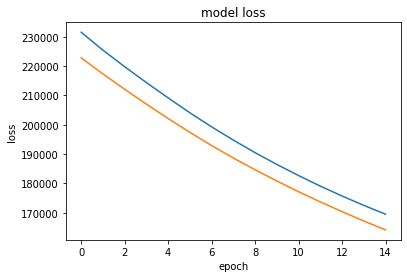

In [66]:
plt.plot(history_mse_house.history['loss'])
plt.plot(history_mse_house.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()